In [ ]:
import os.path
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from nltk.corpus import stopwords
from nltk.stem   import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/WELFake_Dataset (1).csv")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.shape

(72134, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

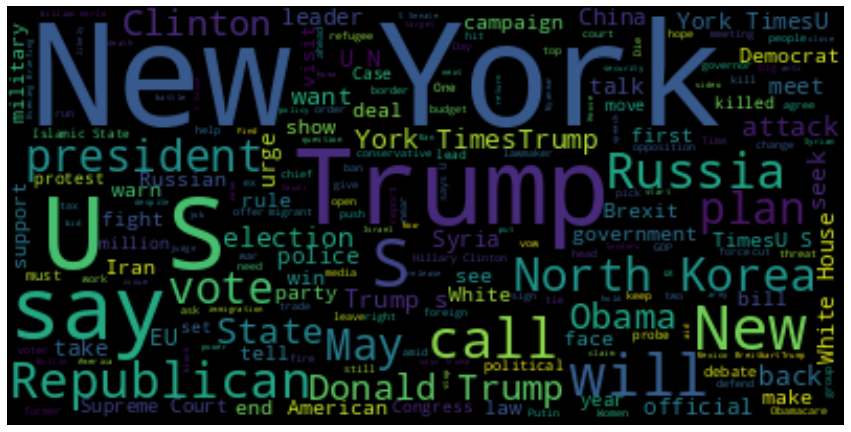

In [ ]:
wc = WordCloud().generate(df.groupby('label')['title'].sum()[0])
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

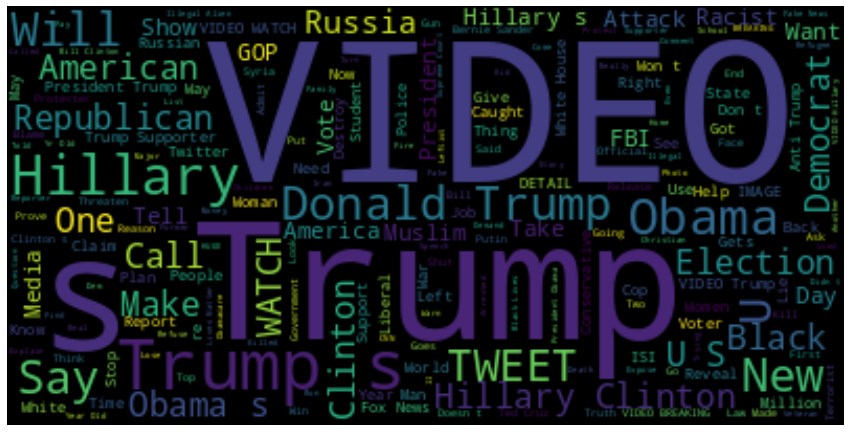

In [ ]:
wc = WordCloud().generate(df.groupby('label')['title'].sum()[1])
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    text = ''.join([c for c in text if c not in string.punctuation and c not in string.digits])
    tokens = word_tokenize(text, 'english')
    lemmatiser = WordNetLemmatizer()
    lemmatized = [lemmatiser.lemmatize(word) for word in tokens]
    sw = stopwords.words('english')
    stopped = [word for word in lemmatized if word.lower() not in sw]
    return stopped
preprocess_text(df['title'][0])

['LAW',
 'ENFORCEMENT',
 'HIGH',
 'ALERT',
 'Following',
 'Threats',
 'Cops',
 'Whites',
 'BlackLivesMatter',
 'FYF',
 'Terrorists',
 'VIDEO']

In [ ]:
from sklearn.model_selection import train_test_split

X = df['title']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.shape[0], X_test.shape[0]

(57707, 14427)

In [ ]:
y_train.value_counts(normalize=True)

1    0.513508
0    0.486492
Name: label, dtype: float64

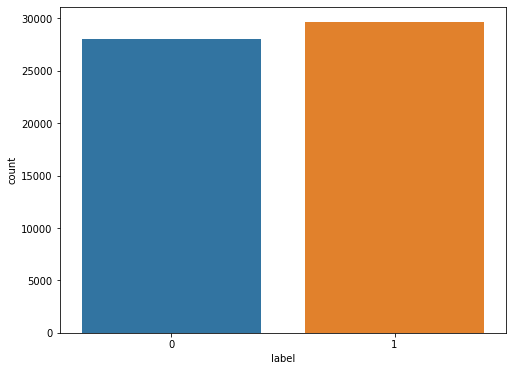

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=y_train)
plt.show()

In [ ]:
fig=px.histogram(df, x="label", color="label")
fig.show()

In [ ]:
X_train = X_train.fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=preprocess_text).fit(X_train)
text_bow_train = bow_transformer.transform(X_train)

In [ ]:
from sklearn.metrics import classification_report

X_test = X_test.fillna('')
text_bow_test = bow_transformer.transform(X_test)

#y_pred = model1.predict(text_bow_test)
#print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(text_bow_train, y_train)


test_pred1 = model1.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, model1.predict(text_bow_train)))
print(accuracy_score(y_test, model1.predict(text_bow_test)))


# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred1) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_pred1) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_pred1) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_pred1) * 100} %\n\n")


0.9812154504652815
0.9430234976086505
Test Set Accuracy : 94.30234976086504 %


Test Set Precision : 93.52179034157832 %


Test Set Recall : 95.62424729024488 %


Test Set F1 : 94.5613338626439 %




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.tree import DecisionTreeClassifier

modela2 = DecisionTreeClassifier()
modela2.fit(text_bow_train, y_train)


test_preda2 = modela2.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, modela2.predict(text_bow_train)))
print(accuracy_score(y_test, modela2.predict(text_bow_test)))


# Model evaluation
print(f"Decision Tree Set Accuracy : {accuracy_score(y_test, test_preda2) * 100} %\n\n")
#print(f"Test Set precision : {precision_score(y_test, test_pred2) * 100} %\n\n")
print(f"Decision Tree Test Set Precision : {precision_score(y_test, test_preda2) * 100} %\n\n")
print(f"Decision Tree Test Set Recall : {recall_score(y_test, test_preda2) * 100} %\n\n")
print(f"Decision Tree Test Set F1 : {f1_score(y_test, test_preda2) * 100} %\n\n")
#print(f"Classification Report : \n\n{classification_report(y_test, test_pred2)}")


0.999948013239295
0.9239620156650724
Decision Tree Set Accuracy : 92.39620156650724 %


Decision Tree Test Set Precision : 91.92530247238295 %


Decision Tree Test Set Recall : 93.53673223604979 %


Decision Tree Test Set F1 : 92.72401671420045 %




In [ ]:
from sklearn.naive_bayes import MultinomialNB

model4 = MultinomialNB()
model4.fit(text_bow_train, y_train)

test_pred4 = model4.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, model4.predict(text_bow_train)))
print(accuracy_score(y_test, model4.predict(text_bow_test)))

# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred4) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_pred4) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_pred4) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_pred4) * 100} %\n\n")

0.9317587121146481
0.9103070631454911
Test Set Accuracy : 91.03070631454912 %


Test Set Precision : 91.0346659582946 %


Test Set Recall : 91.7168473170079 %


Test Set F1 : 91.37448340221303 %




In [ ]:
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
modela7 = XGBClassifier()

modela7.fit(text_bow_train, y_train)


test_preda7 = modela7.predict(text_bow_test)


# testing the model
print(accuracy_score(y_train, modela7.predict(text_bow_train)))
print(accuracy_score(y_test, modela7.predict(text_bow_test)))


# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_preda7) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_preda7) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_preda7) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_preda7) * 100} %\n\n")

0.9189526400609977
0.9116240382615929
Test Set Accuracy : 91.16240382615929 %


Test Set Precision : 89.14855987872663 %


Test Set Recall : 94.43329318881307 %


Test Set F1 : 91.7148612645396 %




In [ ]:
modela6 = SGDClassifier()

modela6.fit(text_bow_train, y_train)


test_preda6 = modela6.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, modela6.predict(text_bow_train)))
print(accuracy_score(y_test, modela6.predict(text_bow_test)))


# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_preda6) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_preda6) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_preda6) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_preda6) * 100} %\n\n")

0.9741105931689397
0.9390032577805504
Test Set Accuracy : 93.90032577805503 %


Test Set Precision : 93.24412960776597 %


Test Set Recall : 95.11575003345378 %


Test Set F1 : 94.17064122946476 %




In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier

# importing voting classifier
from sklearn.ensemble import VotingClassifier



# initializing all the model objects with default parameters
model_v1 = LogisticRegression()
model_v2 = DecisionTreeClassifier()
model_v3 = MultinomialNB()
model_v4 = SGDClassifier()
model_v5 = XGBClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
	estimators=[('lr', model_v1), ('dt', model_v2), ('nb', model_v3),
  ('sgd',  model_v4), ('xgbc', model_v5)],
   voting='hard')

# training all the model on the train dataset
final_model.fit(text_bow_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(text_bow_test)

# printing log loss between actual and predicted value
print(log_loss(y_test, pred_final))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



2.1185983277168745


In [ ]:
print(f"Voting classifier Set Accuracy : {accuracy_score(y_test, pred_final) * 100} %\n\n")
#print(f"Test Set precision : {precision_score(y_test, test_pred2) * 100} %\n\n")
print(f"Voting classifier Precision : {precision_score(y_test, pred_final) * 100} %\n\n")
print(f"Voting classifier Recall : {recall_score(y_test, pred_final) * 100} %\n\n")
print(f"Voting classifier F1 : {f1_score(y_test, pred_final) * 100} %\n\n")
#print(f"Classification Report : \n\n{classification_report(y_test, test_pred2)}")

Voting classifier Set Accuracy : 94.1221321133985 %


Voting classifier Precision : 93.24977151064108 %


Voting classifier Recall : 95.57072126321424 %


Voting classifier F1 : 94.39598202484801 %


